In this chapter, we will examine the autoregressive moving average process, ARMA(p,q), where p denotes the order of the autoregressive portion and q denotes the order of the moving average portion. Furthermore, using the ACF and PACF plots to determine the orders q and p, respectively, becomes difficult, as both plots will show either a slowly decaying or sinusoidal pattern. Thus, we will define a general modeling procedure that will allow us to model such complex time series. This procedure involves model selection using the Akaike information criterion (AIC), which will determine the optimal combination of p and q for our series. Then we must evaluate the model’s validity using residual analysis by studying the correlogram, Q-Q plot, and density plot of the model’s residuals to assess if they closely resemble white noise. If that is the case, we can move on to forecasting our time series using the ARMA(p,q) model.

This chapter will introduce foundational knowledge for forecasting complex time series. All the concepts introduced here will be reused in further chapters when we start modeling

## 6.1 Forecasting bandwidth usage for data centers

Suppose that you are tasked with predicting bandwidth usage for a large data center. Bandwidth is defined as the maximum rate of data that can be transferred. Its base unit is bits per second (bps).

Forecasting bandwidth usage allows data centers to better manage their computing resources. In the case where less bandwidth usage is expected, they can shut down some of their computing resources. This in turns reduces expenses and allows for maintenance. On the other hand, if bandwidth usage is expected to increase, they can dedicate the required resources to sustain the demand and ensure low latency, thus keeping their customers satisfied.

In order to forecast bandwidth usage, we need to identify the underlying process in our series. Thus, we’ll follow the steps that we defined in chapter 5. That way, we can verify whether we have a random walk, a moving average process, or an autoregressive process.

The first step is to collect the data, which is already done in this case. Then we must determine if our series is stationary or not. The presence of a trend in the plot hints that our series is not stationary. Nevertheless, we will apply the ADF test to check for stationarity and apply a transformation accordingly.

Then we will plot the ACF function and find that there are significant autocorrelation coefficients after lag 0, which means it is not a random walk. However, we will observe that coefficients slowly decay. They do not become abruptly non-significant after a certain lag, which means that it is not a purely moving average process.

We’ll then move on to plotting the PACF function. This time we will notice a sinusoidal pattern, meaning that coefficients do not become abruptly non-significant after a certain lag. This will lead us to the conclusion that it is not a purely autoregressive process either.

Therefore, it must be a combination of autoregressive and moving average processes, resulting in an autoregressive moving average process that can be modeled with the ARMA(p,q) model, where p is the order of the autoregressive process and q is the order of the moving average process. It is difficult to use the ACF and PACF plots to respectively find p and q, so we will fit many ARMA(p,q) models with different combinations of values for p and q. We will then select a model according to the Akaike information criterion and assess its viability by analyzing its residuals. Ideally, the residuals of a model will have characteristics similar to white noise. Then we will be able to use this model to make forecasts. For this example, we will forecast the hourly bandwidth usage over the next two hours.

## 6.2 Examining the autoregressive moving average process

The autoregressive moving average process is a combination of the autoregressive process and the moving average process. It states that the present value is linearly dependent on its own previous values and a constant, just like in an autoregressive process, as well as on the mean of the series, the current error term, and past error terms, like in a moving average process.

The autoregressive moving average process is denoted as ARMA(p,q), where p is the order of the autoregressive portion, and q is the order of the moving average portion.

Mathematically, the ARMA(p,q) process is expressed as a linear combination of a constant C, the past values of the series $y_{t.p}$, the mean of the series $\mu$, past error terms $\epsilon_{t-q}$, and the current error term $\epsilon_t$
<br/>
<center>$y_t = C + \Phi_1 y_{t-1} + \Phi_2 y_{t-2} + ... + \Phi_p y_{t-p} + \mu +\epsilon_t + \Theta_1 \epsilon_{t-1} + \Theta_2 \epsilon_{t-2} + ... + \Theta_q \epsilon_{t-q} $</center>


Again, the order p determines the number of past values that affect the present value. Similarly, the order q determines the number of past error terms that affect the present value. In other words, the orders p and q dictate the number of parameters for the autoregressive and moving average portions, respectively.

Thus, if we have an ARMA(1,1) process, we are combining an autoregressive process of order 1, or AR(1), with a moving average process of order 1, or MA(1).

Recall that a first-order autoregressive process is a linear combination of a constant C, the value of the series at the previous timestep $\Phi_1 y_{t-1}$, and white noise $\epsilon_t$.

Also recall that a first-order moving average process, or MA(1), is a linear combination of the mean of the series $\mu$, the current error term $\epsilon_t$ , and the error term at the previous timestep $\Theta_1 \epsilon_{t-1}$.

In the case where p = 0, we have an ARMA(0,q) process, which is equivalent to a pure MA(q) process as seen in chapter 4. Similarly, if q = 0, we have an ARMA(p,0) process, which is equivalent to a pure AR(p) process, as seen in chapter 5.

We can see now how the order p only affects the autoregressive portion of the process by determining the number of past values to include in the equation. Similarly, the order q only affects the moving average portion of the process by determining the number of past error terms to include in the equation of ARMA(p,q). Of course, the higher the orders p and q, the more terms that are included, and the more complex our process becomes.

In order to model and forecast an ARMA(p,q) process, we need to find the orders p and q. That way, we can use an ARMA(p,q) model to fit the available data and produce forecasts.

## 6.3 Identifying a stationary ARMA process

Now that we’ve defined the autoregressive moving average process and seen how the orders p and q affect the model’s equation, we need to determine how to identify such an underlying process in a given time series.

We’ll extend the steps that we defined in chapter 5 to include the final possibility that we have an ARMA(p,q) process.

<center><img src="https://i.imgur.com/Na4yoAl.png" alt="Steps to recognize an ARMA(p,q) process" title="Steps to recognize an ARMA(p,q) process" /></center>

We’ll simulate an ARMA(1,1) process. This is equivalent to combining an MA(1) process with an AR(1) process. Specifically, we will simulate the ARMA(1,1) process defined in equation 6.7. Notice that the constant C and mean μ are both equal to 0 here. The coefficients 0.33 and 0.9 are subjective choices for this simulation.
<br/>
<center>$y_t = 0.33y_{t-1} + 0.9\epsilon_{t-1} + \epsilon_t$</center>

The objective of this simulation is to demonstrate that we cannot use the ACF plot to identify the order q of an ARMA(p,q) process, which in this case is 1, nor can we use the PACF plot to identify the order p of an ARMA(p,q) process, which in this case is 1 also.

We’ll use the ArmaProcess function from the statsmodels library to simulate our ARMA(1,1) process. As in previous chapters, we’ll define the array of coefficients for the AR(1) process, as well as for the MA(1) process. From equation 6.7, we know our AR(1) process will have a coefficient of 0.33. However, keep in mind that the function expects to have the coefficient of the autoregressive process with its opposite sign, as this is how it is implemented in the statsmodels library. Therefore, we input it as –0.33.

For the moving average portion, equation 6.7 specifies that the coefficient is 0.9. Also recall that when defining your arrays of coefficients, the first coefficient is always equal to 1, as specified by the library, which represents the coefficient at lag 0.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)


With our simulated data ready, we can move on to the next step and verify whether our process is stationary or not. We can do this by running the augmented Dickey-Fuller (ADF) test. We’ll print out the ADF statistic as well as the p-value. If the ADF statistic is a large negative number, and if we have a p-value smaller than 0.05, we can reject the null hypothesis and conclude that we have a stationary process.

In [29]:
ADF_result = adfuller(ARMA_1_1)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -6.429878682042678
p-value: 1.707846668009813e-08


This returns an ADF statistic of –6.43 and a p-value of 1.7×10–8. Since we have a large negative ADF statistic and a p-value that’s much smaller than 0.05, we can conclude that our simulated ARMA(1,1) process is stationary.

Following the steps outlined in figure 6.3, we’ll plot the ACF and see if we can infer the order of the moving average portion of our simulated ARMA(1,1) process. Again, we’ll use the plot_acf function from statsmodels to generate figure 6.4.

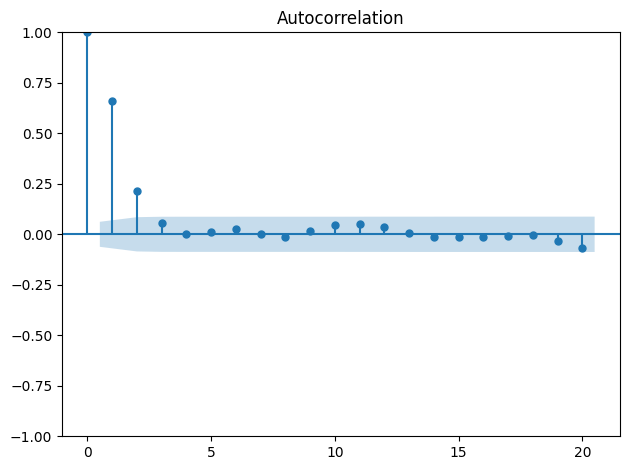

In [30]:
plot_acf(ARMA_1_1, lags=20);
plt.tight_layout()

you’ll notice a sinusoidal pattern in the plot, which indicates the presence of an autoregressive process. This is expected, since we simulated an ARMA(1,1) process and we know of the existence of the autoregressive portion. Furthermore, you’ll notice that the last significant coefficient is at lag 2. However, we know that our simulated data has an MA(1) process, so we would expect to have significant coefficients up to lag 1 only. We can thus conclude that the ACF plot does not reveal any useful information about the order q of our ARMA(1,1) process.

We can now move on to the next step outlined in figure 6.3 and plot the PACF. In chapter 5 you learned that the PACF can be used to find the order of a stationary AR(p) process. We will now verify whether we can find the order p of our simulated ARMA(1,1) process, where p = 1. We’ll use the plot_pacf function to generate figure

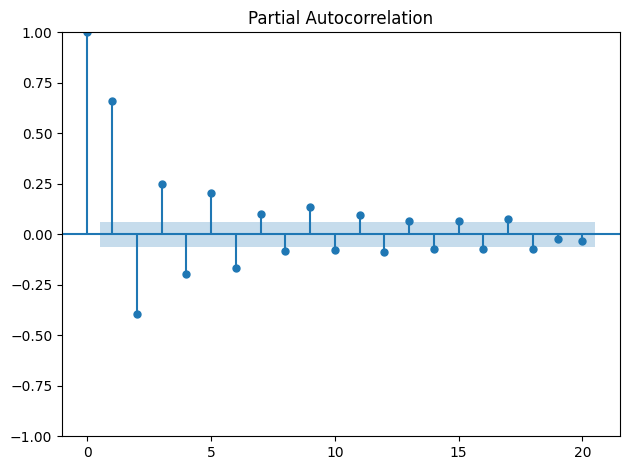

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ARMA_1_1, lags=20);

plt.tight_layout()

we can see a clear sinusoidal pattern, meaning that we cannot infer a value for the order p. We know that we simulated an ARMA(1,1) process, but we cannot determine that value from the PACF plot in figure 6.5, since we have significant coefficients past lag 1. Therefore, the PACF plot cannot be used to find the order p of an ARMA(p,q) process.

According to figure 6.3, since there is no clear cutoff between significant and nonsignificant coefficients in both the ACF and PACF plots, we can conclude that we have an ARMA(p,q) process, which is indeed the case.
> If your process is stationary and both the ACF and PACF plots show a decaying or sinusoidal pattern, then it is a stationary ARMA(p,q) process.

We know that determining the order of our process is key in modeling and forecasting, since the order will dictate how many parameters must be included in our model.

Since the ACF and PACF plots are not useful in the case of an ARMA(p,q) process, we must thus devise a general modeling procedure that will allow us to find the appropriate combination of (p,q) for our model.

## 6.4 Devising a general modeling procedure

In the previous section, we covered the steps for identifying a stationary ARMA(p,q) process. We saw that if both the ACF and PACF plots display a sinusoidal or decaying pattern, our time series can be modeled by an ARMA(p,q) process. However, neither plot was useful for determining the orders p and q. With our simulated ARMA(1,1) process, we noticed that coefficients were significant after lag 1 in both plots.

Therefore, we must devise a procedure that allows us to find the orders p and q. This procedure will have the advantage that it can also be applied in situations where our time series is non-stationary and has seasonal effects. Furthermore, it will also be suitable for cases where p or q are equal to 0, meaning that we can move away from plotting the ACF and PACF and rely entirely on a model selection criterion and residual analysis. The steps are shown in figure 6.6.

In figure 6.6 you can see that this new modeling procedure completely removes the plotting of the ACF and PACF. It allows us to select a model based entirely on statistical tests and numerical criteria, instead of relying on the qualitative analysis of the ACF and PACF plots.

The first few steps remain unchanged from those we gradually built up until chapter 5, as we must still gather the data, test for stationarity, and apply transformations accordingly. Then we list different possible values of p and q—note that they only take positive integers. With a list of possible values, we can fit every unique combination of ARMA(p,q) to our data.

Once that’s done, we can compute the Akaike information criterion (AIC), which is discussed at length in sections 6.4.1 and 6.4.2. This quantifies the quality of each model in relation to each other. The model with the lowest AIC is then selected.

From there, we can analyze the model’s residuals, which is the difference between the actual and predicted values of the model. Ideally, the residuals will look like white noise, which would mean that any difference between the predicted values and actual values is due to randomness. Therefore, the residuals must be uncorrelated and independently distributed. We can assess those properties by studying the quantile-quantile plot (Q-Q plot) and running the Ljung-Box test, which we’ll explore in section 6.4.3. If the analysis leads us to conclude that the residuals are completely random, we have a model ready for forecasting. Otherwise, we must try a different set of values for p and q and start the process over.

### 6.4.1 Understanding the Akaike information criterion (AIC)

Before covering the steps outlined, we need to determine how we will choose the best model of all the models that we will fit. Here we will use the Akaike information criterion (AIC) to select the optimal model.

The AIC estimates the quality of a model relative to other models. Given that there will be some information lost when a model is fitted to the data, the AIC quantifies the relative amount of information lost by the model. The less information lost, the lower the AIC value and the better the model.

The AIC is a function of the number of estimated parameters k and $\mathcal{L}$ the maximum value of the likelihood function for the model
<br/>
<center>$AIC = 2k - 2\ln(\mathcal{L})$</center>

The number of estimated parameters k is directly related to the order (p,q) of an ARMA(p,q) model. If we fit an ARMA(2,2) model, then we have 2 + 2 = 4 parameters to estimate. If we fit an ARMA(3,4) model, then we have 3 + 4 = 7 parameters to estimate. You can see how fitting a more complex model can penalize the AIC score: as the order (p,q) increases, the number of parameters k increases, and so the AIC increases.

The likelihood function measures the goodness of fit of a model. It can be viewed as the opposite of the distribution function. Given a model with fixed parameters, the distribution function will measure the probability of observing a data point. The likelihood function flips the logic. Given a set of observed data, it will estimate how likely it is that different model parameters will generate the observed data.

For example, consider the situation where we roll a six-sided die. The distribution function tells us that there is a 1/6 probability that we’ll observe one of these values: [1,2,3,4,5,6]. Now let’s flip this logic to explain the likelihood function. Suppose that you roll a die 10 times and you obtain the following values: [1,5,3,4,6,2,4,3,2,1]. The likelihood function will determine how likely it is that the die has six sides. Applying this logic to the context of AIC, we can think of the likelihood function as an answer to the question “How likely is it that my observed data is coming from an ARMA(1,1) model?” If it is very likely, meaning that $\mathcal{L}$ is large, then the ARMA(1,1) model fits the data well.
Therefore, if a model fits the data really well, the maximum value of the likelihood $\mathcal{L}$ will be high. Since the AIC subtracts the natural logarithm of the maximum value of the likelihood, represented by $\mathcal{L}$, then a large value of $\mathcal{L}$ will lower the AIC.

You can see how the AIC keeps a balance between underfitting and overfitting. Remember that the lower the AIC, the better the model relative to other models. Therefore, an overfitting model would have a very good fit, meaning that Lˆ is large and AIC decreases. However, the number of parameters k would be large as well, which penalizes the AIC. An underfitting model would have a small number of parameters, so k would be small. However, the maximum value of the likelihood function would also be small due to the poor fit, meaning again that the AIC is penalized. Thus, the AIC allows us to find a balance between the number of parameters in a model and a good fit to the training data.

Finally, we must keep in mind that the AIC quantifies the quality of a model in relation to other models only. It is therefore a relative measure of quality. In the event that we fit only poor models to our data, the AIC will simply help us determine the best from that group of models.

Now let’s use the AIC to help us select an appropriate model for our simulated ARMA(1,1) process.

### Selecting a model using the AIC

We’ll now cover the steps of the general modeling procedure outlined using our simulated ARMA(1,1) process.

In section 6.3 we tested for stationarity and concluded that our simulated process is already stationary. Therefore, we can move on to defining a list of possible values for p and q. While we know the values of both orders from the simulation, let’s consider the following steps as a demonstration that the general modeling procedure works.

We will allow the values of p and q to vary from 0 to 3. Note that this range is arbitrary, and you may try a larger range of values if you wish. We will create a list of all possible combinations of (p,q), using the product function from itertools. Since there four possible values for p and q, this will generate a list of 16 unique combinations of (p,q).

In [32]:
from itertools import product

ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))

With our list of possible values created, we must now fit all unique 16 ARMA(p,q) models to our simulated data. To do so, we’ll define an optimize_ARMA function that takes the data and the list of unique (p,q) combinations as input. Inside the function, we’ll initialize an empty list to store each (p,q) combination and its corresponding AIC.

Then we’ll iterate over each (p,q) combination and fit an ARMA(p,q) model to our data. We’ll compute the AIC and store the result. Then we’ll create a DataFrame and sort it by AIC value in ascending order, since the lower the AIC, the better the model.

Our function will finally output the ordered DataFrame so we can select the appropriate model. The optimize_ARMA function is shown in the following listing.

In [33]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

With our function defined, we can now use it and fit the different ARMA(p,q) models.

In [34]:
result_df = optimize_ARMA(ARMA_1_1, order_list)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(1, 1)",2801.407785
1,"(2, 1)",2802.906070
2,"(1, 2)",2802.967762
3,"(0, 3)",2803.666793
4,"(1, 3)",2804.524027
5,"(3, 1)",2804.588567
6,"(2, 2)",2804.822282
7,"(2, 3)",2806.175380
8,"(3, 3)",2806.186254
9,"(3, 2)",2806.894930


As mentioned in the previous section, the AIC is a measure of relative quality. Here we can say that an ARMA(1,1) model is the best model relative to all other models that we fit to our data. Now we need an absolute measure of the model’s quality. This brings us to the next step of our modeling procedure, which is residual analysis.

### 6.4.3 Understanding residual analysis

Up to this point, we have fit different ARMA(p,q) models to our simulated ARMA(1,1) process. Using the AIC as a model selection criterion, we found that an ARMA(1,1) model is the best model relative to all others that were fit. Now we must measure its absolute quality by performing an analysis on the model’s residuals.

This brings us to the last steps before forecasting, which is residual analysis and answering two questions: does the Q-Q plot show a straight line, and are the residuals uncorrelated? If the answer to both questions is yes, then we have a model that’s ready to make forecasts. Otherwise, we must try different combinations of (p,q) and restart the process.

The residuals of a model are simply the difference between the predicted values and the actual values. Consider our simulated ARMA(1,1) process expressed in equation:
<br/>
<center>$y_t = 0.33y_{t-1} + 0.9\epsilon_{t-1} + \epsilon_t$</center>


Now suppose that we fit an ARMA(1,1) model to our process, and we estimate the model’s coefficients perfectly, such that the model is expressed as equation
<br/>
<center>$y_t = 0.33y_{t-1} + 0.9\epsilon_{t-1}$</center>

The residuals will be the difference between the values coming from our model and the observed values from our simulated process: $residuals = \epsilon_t$

in a perfect situation the residuals of a model are white noise. This indicates that the model has captured all predictive information, and there is only a random fluctuation left that cannot be modeled. Thus, the residuals must be uncorrelated and have a normal distribution in order for us to conclude that we have a good model for making forecasts.

There are two aspects to residual analysis: a qualitative analysis and a quantitative analysis. The qualitative analysis focuses on studying the Q-Q plot, while the quantitative analysis determines whether our residuals are uncorrelated.

#### QUALITATIVE ANALYSIS: STUDYING THE Q-Q PLOT

The first step in residual analysis is the study of the quantile-quantile plot (Q-Q plot). The Q-Q plot is a graphical tool for verifying our hypothesis that the model’s residuals are normally distributed.

The Q-Q plot is constructed by plotting the quantiles of our residuals on the y-axis against the quantiles of a theoretical distribution, in this case the normal distribution, on the x-axis. This results in a scatterplot. We are comparing the distribution to a normal distribution because we want the residuals to be similar to white noise, which is normally distributed.

If both distributions are similar, meaning that the distribution of the residuals is close to a normal distribution, the Q-Q plot will display a straight line that approximately lies on y = x. This in turn means that our model is a good fit for our data.

On the other hand, a Q-Q plot of residuals that are not close to a normal distribution will generate a curve that departs from y = x. If we get this sort of result, we can conclude that the distribution of our residuals does not resemble a normal distribution, which is a sign that our model is not a good fit for our data. Therefore, we must try a different range of values for p and q, fit the models, select the one with the lowest AIC, and perform residual analysis on the new model.

While the Q-Q plot is a fast method for assessing the quality of our model, this analysis remains subjective. Thus, we will further support our residual analysis with a quantitative method by applying the Ljung-Box test.

#### QUANTITATIVE ANALYSIS: APPLYING THE LJUNG-BOX TEST

Once we have analyzed the Q-Q plot and determined that our residuals are approximately normally distributed, we can then apply the Ljung-Box test to demonstrate that the residuals are uncorrelated. Remember that a good model has residuals that are similar to white noise, so the residuals should be normally distributed and uncorrelated. The Ljung-Box test is a statistical test that tests if the autocorrelation of a group of data is significantly different from 0. In our case, we will apply the Ljung-Box test to the model’s residuals to assess  whether they are correlated or not. The null hypothesis states that the data is independently distributed, meaning that there is no autocorrelation.

The test will return the Ljung-Box statistic and a p-value. If the p-value is less than 0.05, we reject the null hypothesis, meaning that the residuals are not independently distributed, which in turn means that there is autocorrelation. In such a situation, the residuals do not approximate the properties of white noise, and the model must be discarded.

If the p-value is larger than 0.05, we cannot reject the null hypothesis, meaning that our residuals are independently distributed. Thus, there is no autocorrelation, and the residuals are similar to white noise. This means that we can move on with our model and make forecasts.

### 6.4.4 Performing residual analysis

We will now resume the modeling procedure for our simulated ARMA(1,1) process. We have successfully selected a model with the lowest AIC, which was expectedly an ARMA(1,1) model. Now, as you can see in figure 6.11, we need to perform residual analysis to assess whether our model is a good fit to the data.

We know that our ARMA(1,1) model must be good, since we simulated an ARMA(1,1) process, but this section will demonstrate that our modeling procedure works. We are not likely to be modeling and forecasting simulated data in a business context, so it is important to cover the entire modeling procedure on a known process first, to convince ourselves that it works, before applying it on real-life data.

To perform residual analysis, we need to fit our model and store the residuals in a variable for easy access. Using statsmodels, we will first define an ARMA(1,1) model before fitting it to our simulated data. Then we can access the residuals with the resid property.



In [35]:
model = SARIMAX(ARMA_1_1, order=(1,0,1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

The next step is to plot the Q-Q plot, and we’ll use the qqplot function from statsmodels to display our residuals against a normal distribution. The function simply requires the data, and it will by default compare its distribution to a normal distribution. We’ll also need to display the line y = x in order to assess the similarity of both distributions.

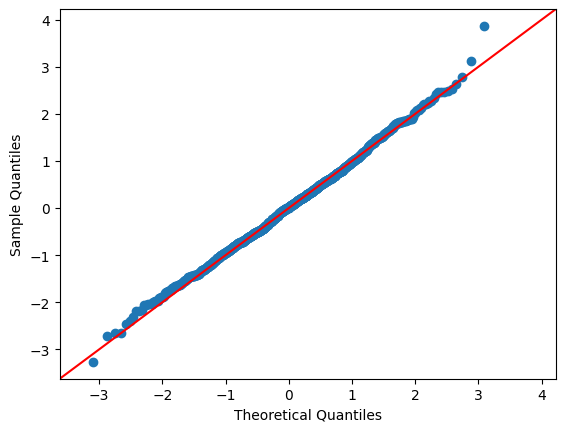

In [36]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='45');

The result is shown in figure 6.12. You will see a thick straight line that approximately lies on y = x. Therefore, from a qualitative standpoint, the model’s residuals seem to be normally distributed, just like white noise, which is an indication that our model fits the data well.

We’ll extend our qualitative analysis by using the plot_diagnostics method. This generates a figure containing four different plots, including a Q-Q plot.

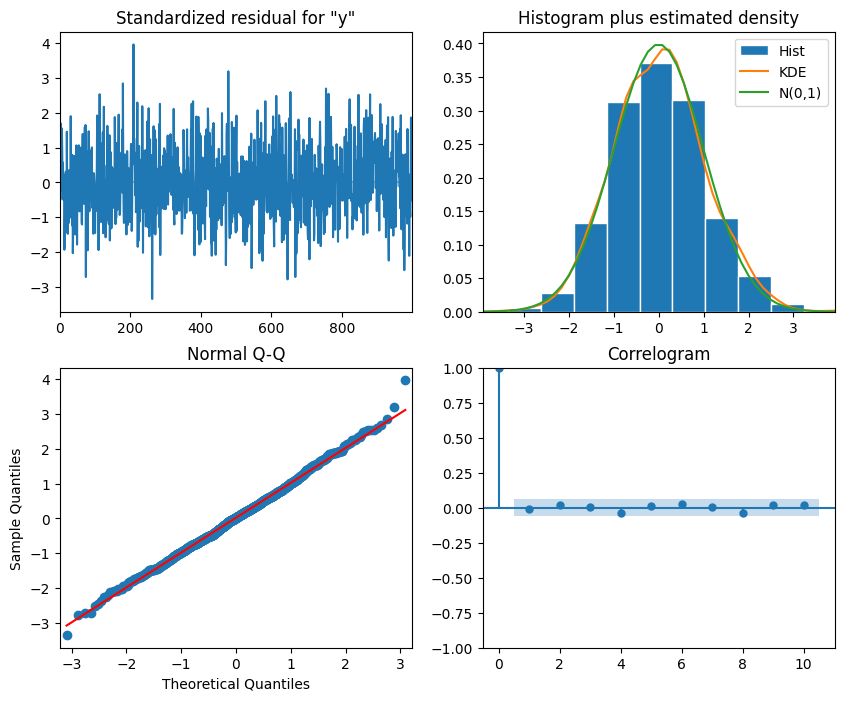

In [37]:
model_fit.plot_diagnostics(figsize=(10, 8));

The top-left plot shows the residuals across the entire dataset. You can see that there is no trend, and the mean seems stable over time, which is indicative of stationarity, just like white noise.

The top-right plot shows a histogram of the residuals. You can see the shape of a normal distribution on this plot, which again indicates that the residuals are close to white noise, as white noise is normally distributed as well.

At the bottom left, we have the Q-Q plot, which is identical to figure 6.12, and therefore leads us to the same conclusion.

Finally, the bottom-right plot shows the autocorrelation function of our residuals. You can see that there is only a significant peak at lag 0, and no significant coefficients otherwise. This means that the residuals are not correlated, which further supports the conclusion that they are similar to white noise, which is what we expect from a good model.

The final step in residual analysis is applying the Ljung-Box test. This allows us to quantitatively assess whether our residuals are indeed uncorrelated. We will use the acorr_ljungbox function from statsmodels to perform the Ljung-Box test on the residuals. The function takes as input the residuals as well as a list of lags. Here we will compute the Ljung-Box statistic and p-value for 10 lags.

In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(lb_pvalue)

     lb_stat  lb_pvalue
1   0.030706   0.860897
2   0.528021   0.767966
3   0.540904   0.909817
4   2.079774   0.721089
5   2.271897   0.810385
6   2.896262   0.821750
7   2.900378   0.894063
8   4.418799   0.817501
9   4.787567   0.852419
10  5.246805   0.874093


The resulting list of p-values shows that each is above 0.05. Therefore, at each lag, the null hypothesis cannot be rejected, meaning that the residuals are independently distributed and uncorrelated.

We can conclude from our analysis that the residuals are similar to white noise. The Q-Q plot showed a straight line, meaning that the residuals are normally distributed. Furthermore, the Ljung-Box test shows that the residuals are uncorrelated, just like white noise. Thus, the residuals are completely random, meaning that we have a model that fits our data well.

### 6.5 Applying the general modeling procedure

We now have a general modeling procedure that allows us to model and forecast a general ARMA(p,q) model.
<br/>
<center><img src="https://i.imgur.com/wbpG5oe.png" alt="Steps to recognize an ARMA(p,q) process" title="Steps to recognize an ARMA(p,q) process" /></center>


Now we can apply the same procedure on the bandwidth dataset to obtain the best model possible for this situation. Recall that our objective is to forecast bandwidth usage for the next 2 hours.

The first step is to gather and load the data using pandas:

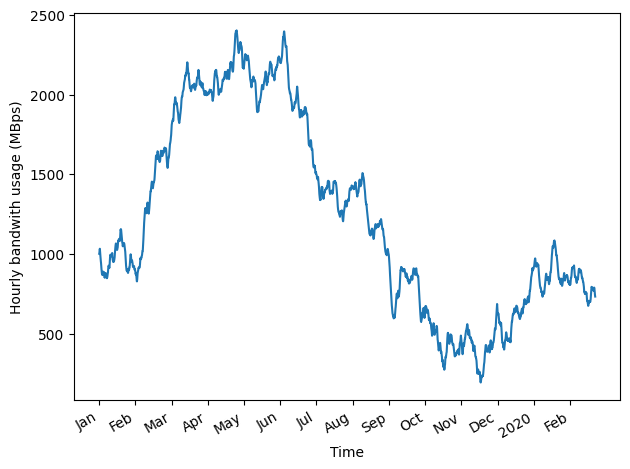

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./bandwidth.csv')

fig, ax = plt.subplots()

ax.plot(df.hourly_bandwidth)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')

plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])

fig.autofmt_xdate()

plt.tight_layout()

With the data plotted in figure 6.15, you can see that there is no periodic pattern in the data. However, you’ll notice the presence of a long-term trend, meaning that our data is likely not stationary. Let’s apply the ADF test to verify our hypothesis. Again, we’ll use the adfuller function from statsmodels and print out the ADF statistic and the p-value.

In [40]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['hourly_bandwidth'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.8714653199452729
p-value: 0.7972240255014553


This prints out an ADF statistic of –0.8 and a p-value of 0.80. Therefore, we cannot reject the null hypothesis, meaning that our time series is not stationary.

We must apply a transformation to our data in order to make it stationary. Let’s apply a first-order differencing using numpy.

In [41]:
import numpy as np

bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)

ADF_result = adfuller(bandwidth_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -20.694853863789017
p-value: 0.0


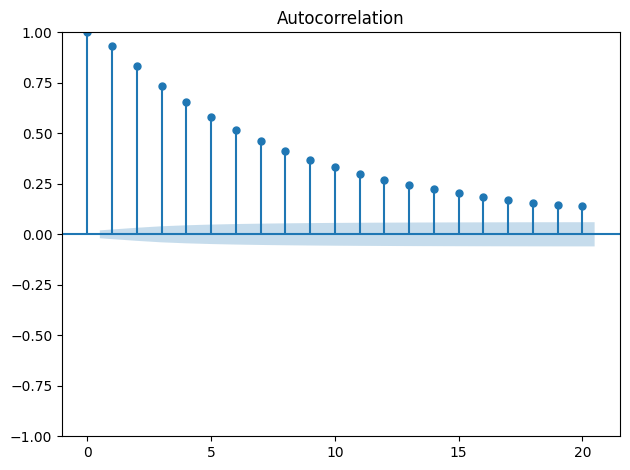

In [42]:
plot_acf(bandwidth_diff, lags=20);

plt.tight_layout()

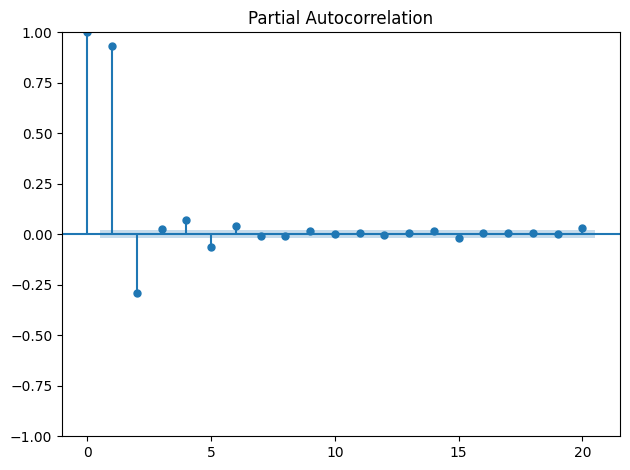

In [43]:
plot_pacf(bandwidth_diff, lags=20);

plt.tight_layout()

This returns an ADF statistic of –20.69 and a p-value of 0.0. With a large, negative ADF statistic and a p-value that is much smaller than 0.05, we can say that our differenced series is stationary.

We are now ready to start modeling our stationary process using an ARMA(p,q) model. We’ll split our series into train and test sets. Here we’ll keep the last 7 days of data for the test set. Since our forecasts are for the next 2 hours, the test set thus contains 84 periods of 2 hours on which to evaluate our models’ performance, since 7 days of hourly data totals 168 hours.

In [44]:
df_diff = pd.DataFrame({'bandwidth_diff': bandwidth_diff})

train = df_diff[:-168]
test = df_diff[-168:]

print(len(train))
print(len(test))

9831
168


We can print out the length of the train and test sets as a sanity check, and sure enough, the test set has 168 data points, and the train set has 9,831 data points.

Now let’s visualize our train set and test set for both the differenced and original series.

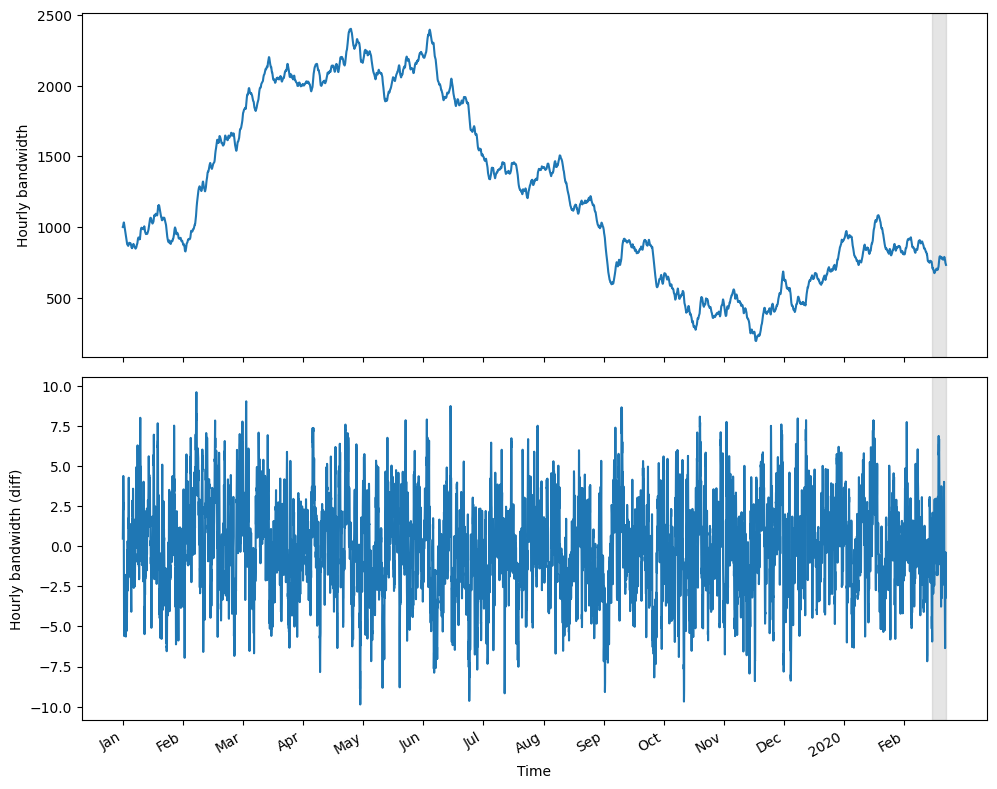

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))
ax1.plot(df.hourly_bandwidth)
ax1.set_xlabel('Time')
ax1.set_ylabel('Hourly bandwidth')
ax1.axvspan(9831, 10000, color='#808080', alpha=0.2)

ax2.plot(df_diff.bandwidth_diff)
ax2.set_xlabel('Time')
ax2.set_ylabel('Hourly bandwidth (diff)')
ax2.axvspan(9830, 9999, color='#808080', alpha=0.2)
plt.xticks(
    np.arange(0, 10000, 730),
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb'])

fig.autofmt_xdate()
plt.tight_layout()


With our train set ready, we can now fit different ARMA(p,q) models using the optimize_ARMA function that we defined earlier. Remember that the function takes the data and the list of unique (p,q) combinations as input. Inside the function, we initialize an empty list to store each (p,q) combination and its corresponding AIC. Then we iterate over each (p,q) combination and fit an ARMA(p,q) model on our data. We compute the AIC and store the result. Then we create a DataFrame and sort it by AIC value in ascending order, since the lower the AIC, the better the model. Our function finally outputs the ordered DataFrame so we can select the appropriate model. The optimize_ARMA function is shown in the following listing.

In [46]:
from typing import Union

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

Here we will try values for p and q ranging from 0 to 3 inclusively. This means that we will fit 16 unique ARMA(p,q) models to our training set and select the one with the lowest AIC. Feel free to change the range of values for p and q, but keep in mind that a larger range will result in more models being fit and a longer computation time. Also, you don’t need to worry about overfitting—we are selecting our model using the AIC, which will prevent us from selecting a model that overfits.

In [47]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))

With this step done, we can pass in our training set and the list of unique (p,q) combinations to the optimize_ARMA function.

In [48]:
result_df = optimize_ARMA(train['bandwidth_diff'], order_list)

result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC
0,"(3, 2)",27991.063879
1,"(2, 3)",27991.287509
2,"(2, 2)",27991.603598
3,"(3, 3)",27993.416924
4,"(1, 3)",28003.349550
5,"(1, 2)",28051.351401
6,"(3, 1)",28071.155496
7,"(3, 0)",28095.618186
8,"(2, 1)",28097.250766
9,"(2, 0)",28098.407664


The resulting DataFrame is shown in figure 6.17. You’ll notice that the first three models all have an AIC of 27,991, with only slight differences. Therefore, I would argue that the ARMA(2,2) model is the model that should be selected. Its AIC value is very close to the ARMA(3,2) and ARMA(2,3) models, while being less complex, since it has four parameters to be estimated instead of five. Therefore, we’ll select the ARMA(2,2) model and move on to the next steps, which is the analysis of the model’s residuals.

To perform the residual analysis, we’ll fit the ARMA(2,2) model on our training set. Then we’ll use the plot_diagnostics method to study the Q-Q plot, as well as the other accompanying plots.

In [49]:
model = SARIMAX(train['bandwidth_diff'], order=(2,0,2), simple_differencing=False)

model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         bandwidth_diff   No. Observations:                 9831
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -13990.802
Date:                Mon, 19 Sep 2022   AIC                          27991.604
Time:                        16:28:41   BIC                          28027.570
Sample:                             0   HQIC                         28003.788
                               - 9831                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3486      0.052      6.765      0.000       0.248       0.450
ar.L2          0.4743      0.047     10.000      0.000       0.381       0.567
ma.L1          0.8667      0.050     17.249      0.0

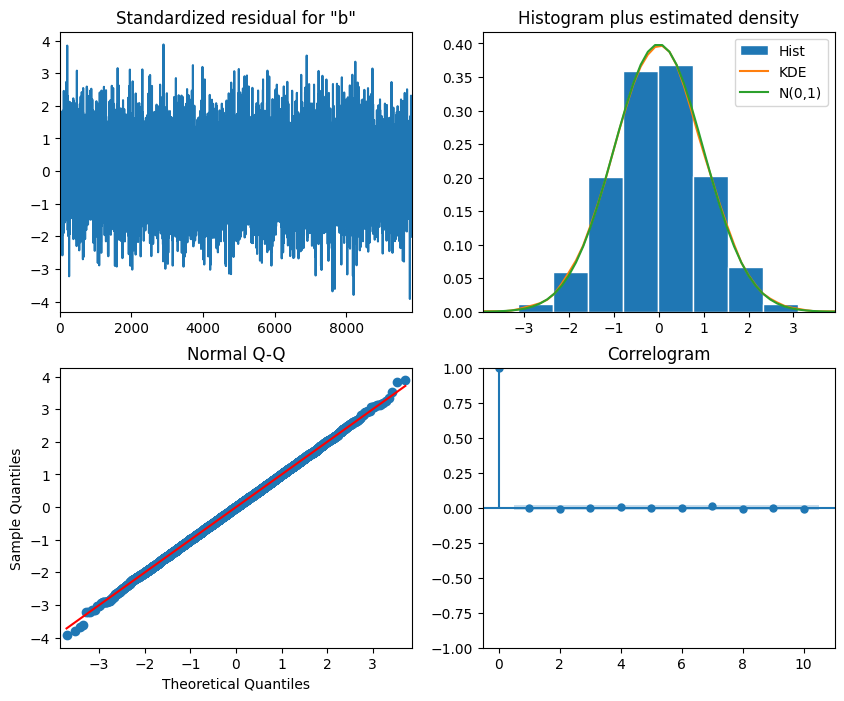

In [50]:
model_fit.plot_diagnostics(figsize=(10, 8));

Our last step is to run the Ljung-Box test on the residuals for the first 10 lags. If the returned p-values exceed 0.05, we cannot reject the null hypothesis, which means that our residuals are uncorrelated and independently distributed, just like white noise.

In [51]:
residuals = model_fit.resid

pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

     lb_stat  lb_pvalue
1   0.042190   0.837257
2   0.418364   0.811247
3   0.520271   0.914416
4   0.850554   0.931545
5   0.850841   0.973678
6   1.111754   0.981019
7   2.124864   0.952607
8   3.230558   0.919067
9   3.248662   0.953615
10  3.588289   0.964015


The returned p-values all exceed 0.05. Therefore, we can conclude that our residuals are indeed uncorrelated. Our ARMA(2,2) model has passed all the checks on the residual analysis, and we are ready to use this model to forecast bandwidth usage.

## 6.6 Forecasting bandwidth usage

In the previous section, we applied the general modeling procedure on the bandwidth dataset and concluded than an ARMA(2,2) model was the best model for our data. Now we will use the ARMA(2,2) model to forecast the next 2 hours of bandwidth usage over 7 days.

We will reuse the rolling_forecast function that we defined and used in chapters 4 and 5, as shown in listing 6.3. Recall that this function allows us to forecast a few timesteps at a time, until we have forecasts for the entire horizon. This time, of course, we’ll fit an ARMA(2,2) model to our differenced data. Also, we’ll compare the model’s performance to two benchmarks: the mean and the last known value. This will allow us to make sure that an ARMA(2,2) model performs better than naive forecasting methods.

In [52]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'ARMA':
        pred_ARMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)

        return pred_ARMA

With rolling_forecast defined, we can use it to evaluate the performance of the different forecasting methods. We’ll first create a DataFrame to hold the actual values of the test set as well as the predictions from the different methods. Then we’ll specify the size of the train and test sets. We will predict two steps at a time, because we have an ARMA(2,2) model, meaning that there is an MA(2) component. We know from chapter 4 that predicting beyond q steps into the future with an MA(q) model will simply return the mean, so the predictions will remain flat. We’ll therefore avoid this situation by setting the window to 2. We can then forecast on the test set using the mean method, the last known value method, and the ARMA(2,2) model, and store each forecast in its appropriate column in test.

In [53]:

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_ARMA'] = pred_ARMA

test.head()

,bandwidth_diff,pred_mean,pred_last_value,pred_ARMA
9831,-5.943995,-0.028214,-5.791207,-5.460661
9832,-5.865194,-0.028214,-5.791207,-4.890626
9833,-3.197066,-0.029410,-5.865194,-5.335905
9834,-1.090197,-0.029410,-5.865194,-4.751731
9835,0.665291,-0.029840,-1.090197,-0.375596


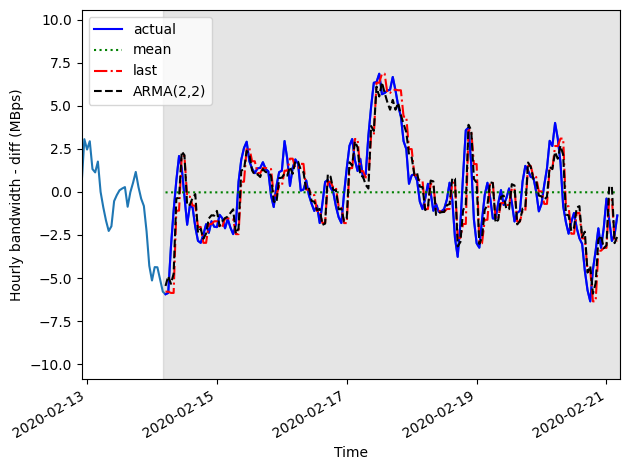

In [54]:
fig, ax = plt.subplots()

ax.plot(df_diff['bandwidth_diff'])
ax.plot(test['bandwidth_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last_value'], 'r-.', label='last')
ax.plot(test['pred_ARMA'], 'k--', label='ARMA(2,2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth - diff (MBps)')

ax.axvspan(9830, 9999, color='#808080', alpha=0.2)

ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()


In figure 6.19 you can see that the ARMA(2,2) forecasts, shown as a dashed line, almost coincide with the actual values of the test set. The same can be said of the forecasts from the last known value method, shown as a dashed and dotted line. Of course, the forecasts using the mean, shown as a dotted line, are completely flat over the testing period.

We’ll now measure the mean squared error (MSE) to evaluate the performance of each model. The model with the lowest MSE is the best-performing model.

In [55]:
mse_mean = mean_squared_error(test['bandwidth_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['bandwidth_diff'], test['pred_last_value'])
mse_ARMA = mean_squared_error(test['bandwidth_diff'], test['pred_ARMA'])

print(mse_mean, mse_last, mse_ARMA)

6.306526957989325 2.2297582947733656 1.7690462113923955


This returns an MSE of 6.3 for the mean method, 2.2 for the last known value method, and 1.8 for the ARMA(2,2) model. The ARMA(2,2) model outperforms the benchmarks, meaning that we have a well-performing model.

The final step is to reverse the transformation of our forecast in order to bring it to the same scale as our original data. Remember that we differenced the original data to make it stationary. The ARMA(2,2) model was then applied on the stationary dataset and produced forecasts that are differenced.

To reverse the differencing transformation, we can apply a cumulative sum, just as we did in chapters 4 and 5.

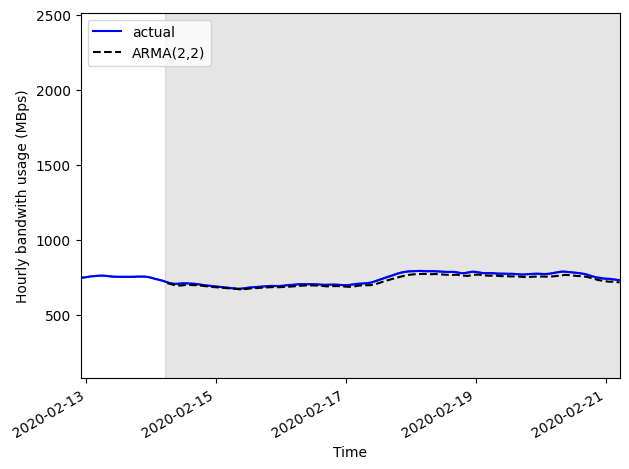

In [56]:
df['pred_bandwidth'] = pd.Series()
df['pred_bandwidth'][9832:] = df['hourly_bandwidth'].iloc[9832] + test['pred_ARMA'].cumsum()

fig, ax = plt.subplots()

ax.plot(df['hourly_bandwidth'])
ax.plot(df['hourly_bandwidth'], 'b-', label='actual')
ax.plot(df['pred_bandwidth'], 'k--', label='ARMA(2,2)')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwith usage (MBps)')
ax.axvspan(9831, 10000, color='#808080', alpha=0.2)
ax.set_xlim(9800, 9999)

plt.xticks(
    [9802, 9850, 9898, 9946, 9994],
    ['2020-02-13', '2020-02-15', '2020-02-17', '2020-02-19', '2020-02-21'])

fig.autofmt_xdate()
plt.tight_layout()

We can measure the mean absolute error (MAE) of the undifferenced ARMA(2,2) predictions to understand how far apart the predictions are from the actual values.

We’ll use the MAE simply because it is easy to interpret.

In [57]:
mae_ARMA_undiff = mean_absolute_error(df['hourly_bandwidth'][9832:], df['pred_bandwidth'][9832:])

print(mae_ARMA_undiff)

14.000362777370801
